In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import layers, Sequential


from sklearn.metrics import r2_score

In [5]:
data = pd.read_excel("data/ENB2012_data.xlsx")

In [6]:
data.columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
               "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]

<h1> Eksplorasi Data Analisis

In [7]:
data.tail(10)
#sepertinya akan lebih menggunakan regresi

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
758,0.66,759.5,318.5,220.5,3.5,4,0.4,5,14.92,17.55
759,0.66,759.5,318.5,220.5,3.5,5,0.4,5,15.16,18.06
760,0.64,784.0,343.0,220.5,3.5,2,0.4,5,17.69,20.82
761,0.64,784.0,343.0,220.5,3.5,3,0.4,5,18.19,20.21
762,0.64,784.0,343.0,220.5,3.5,4,0.4,5,18.16,20.71
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [9]:
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [10]:
data.shape

(768, 10)

In [11]:
data.isnull().sum()
#tidak ada data yang kosong pada dataset

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [12]:
data['Heating Load'].unique().size

587

In [13]:
data['Cooling Load'].unique().size

636

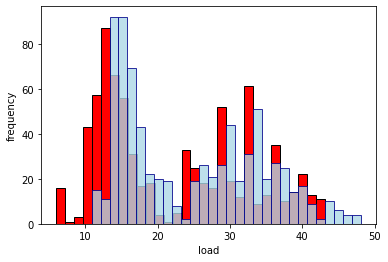

In [14]:
plt.hist((data['Heating Load']), facecolor='red', edgecolor='black', bins=30)
plt.hist((data['Cooling Load']), facecolor='lightblue', edgecolor='darkblue', bins=30, alpha=0.8)
plt.ylabel('frequency')
plt.xlabel('load')
plt.show()
#persebaran tertinggi pada data berada di antara 10 dan 20

<h2> Relative Compactness

In [15]:
data['Relative Compactness'].unique().size

12

In [16]:
data['Relative Compactness'].unique()
#setelah ditelusuri data ini merupakan rasio dari ukuran seberapa compact bangunan

array([0.98, 0.9 , 0.86, 0.82, 0.79, 0.76, 0.74, 0.71, 0.69, 0.66, 0.64,
       0.62])

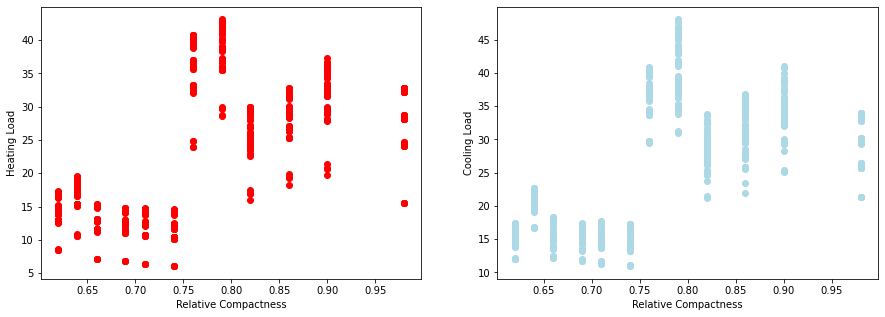

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
ax1.scatter(data['Relative Compactness'], data['Heating Load'], color='red')
ax1.set_xlabel('Relative Compactness')
ax1.set_ylabel('Heating Load')
ax2.scatter(data['Relative Compactness'], data['Cooling Load'], color='lightblue')
ax2.set_xlabel('Relative Compactness')
ax2.set_ylabel('Cooling Load')
plt.show()
#dapat dilihat bahwa semakin tinggi relative compactness maka beban AC untuk pemanas dan pendingin ruangan akan meningkat
#terutama setelah relative compactness lebih dari 0.75

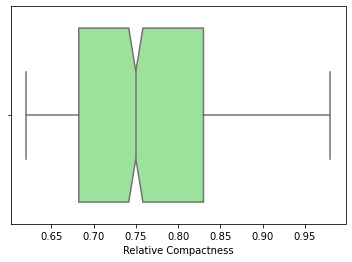

In [18]:
sns.boxplot(data['Relative Compactness'], color="lightgreen",  notch=True)
#tidak ada outliers dari data

<h2> Surface Area

In [19]:
data['Surface Area'].unique().size

12

In [20]:
data['Surface Area'].unique()
#sedikit juga jenis macam  ukuran area surface yang terdata

array([514.5, 563.5, 588. , 612.5, 637. , 661.5, 686. , 710.5, 735. ,
       759.5, 784. , 808.5])

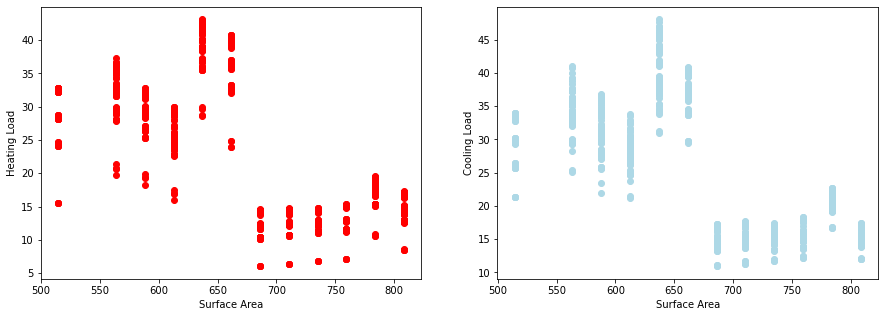

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
ax1.scatter(data['Surface Area'], data['Heating Load'], color='red')
ax1.set_xlabel('Surface Area')
ax1.set_ylabel('Heating Load')
ax2.scatter(data['Surface Area'], data['Cooling Load'], color='lightblue')
ax2.set_xlabel('Surface Area')
ax2.set_ylabel('Cooling Load')
plt.show()
#heating load dan cooling load semakin besar jika surface area 661.5 ke bawah

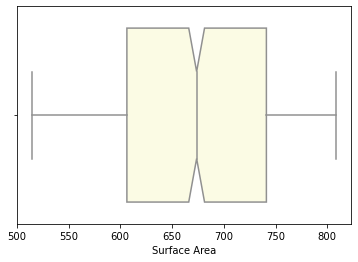

In [22]:
sns.boxplot(data['Surface Area'], color="lightyellow",  notch=True)
#tidak ada outliers pada data surface area 

<h2> Wall Area

In [23]:
data['Wall Area'].unique().size

7

In [24]:
data['Wall Area'].unique()

array([294. , 318.5, 343. , 416.5, 245. , 269.5, 367.5])

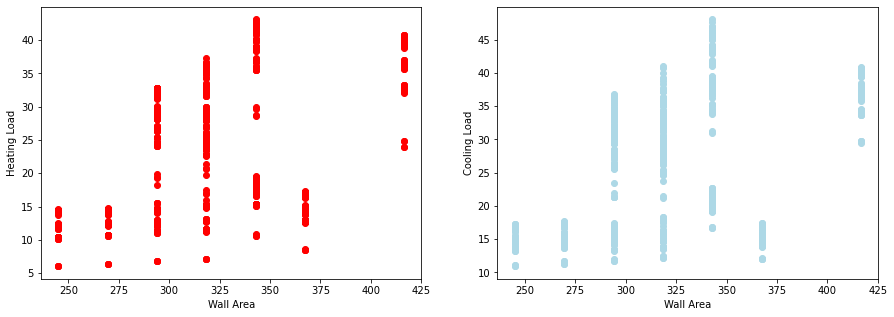

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
ax1.scatter(data['Wall Area'], data['Heating Load'], color='red')
ax1.set_xlabel('Wall Area')
ax1.set_ylabel('Heating Load')
ax2.scatter(data['Wall Area'], data['Cooling Load'], color='lightblue')
ax2.set_xlabel('Wall Area')
ax2.set_ylabel('Cooling Load')
plt.show()
#load relatif rendah saat wall area kurang dari 275 serta diantara 350 dan 375

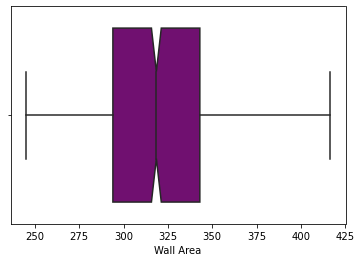

In [26]:
sns.boxplot(data['Wall Area'], color="purple",  notch=True)
#tidak ada outliers pada wall area

<h2> Roof Area

In [27]:
data['Roof Area'].unique().size

4

In [28]:
data['Roof Area'].unique()

array([110.25, 122.5 , 147.  , 220.5 ])

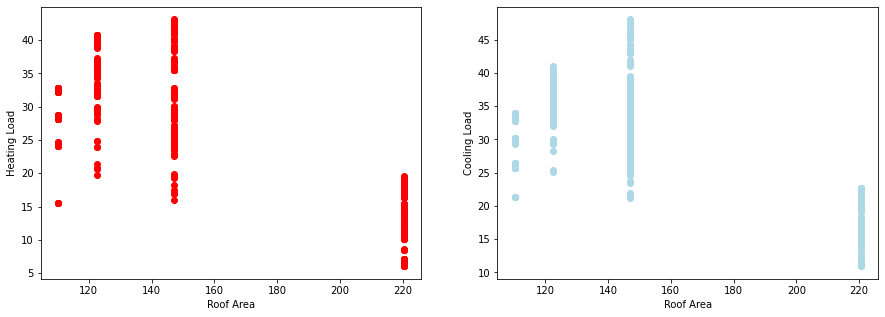

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
ax1.scatter(data['Roof Area'], data['Heating Load'], color='red')
ax1.set_xlabel('Roof Area')
ax1.set_ylabel('Heating Load')
ax2.scatter(data['Roof Area'], data['Cooling Load'], color='lightblue')
ax2.set_xlabel('Roof Area')
ax2.set_ylabel('Cooling Load')
plt.show()
#load bisa tinggi saat roof area dibawah 160

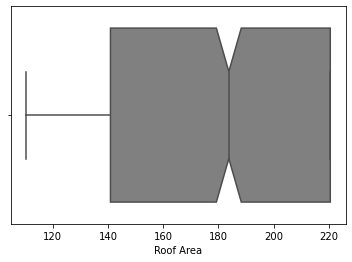

In [30]:
sns.boxplot(data['Roof Area'], color="Gray",  notch=True)
#tidak ada outliers

<h2> Overall Height

In [31]:
data['Overall Height'].unique().size

2

In [32]:
data['Overall Height'].unique()

array([7. , 3.5])

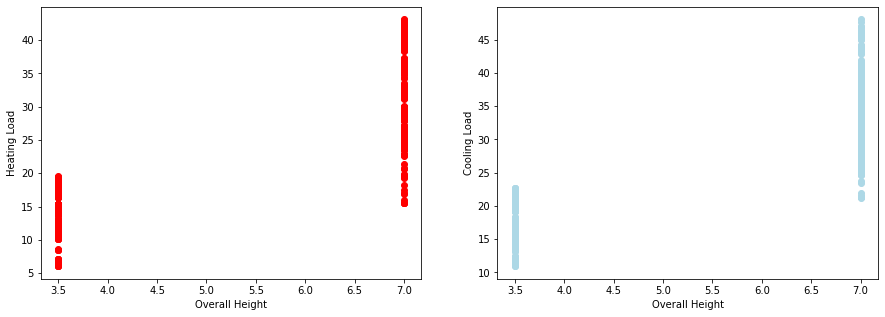

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
ax1.scatter(data['Overall Height'], data['Heating Load'], color='red')
ax1.set_xlabel('Overall Height')
ax1.set_ylabel('Heating Load')
ax2.scatter(data['Overall Height'], data['Cooling Load'], color='lightblue')
ax2.set_xlabel('Overall Height')
ax2.set_ylabel('Cooling Load')
plt.show()
#semakin besar height maka semakin besar load

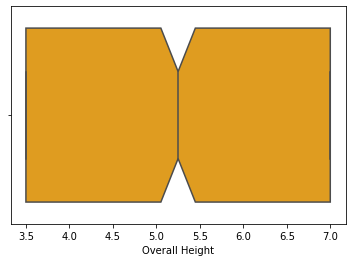

In [34]:
sns.boxplot(data['Overall Height'], color="Orange",  notch=True)
#tidak ada outliers

<h2>Orientation

In [35]:
data['Orientation'].unique().size
#terdapat 4 jenis orientation pada ruangan

4

In [36]:
data['Orientation'].unique()

array([2, 3, 4, 5], dtype=int64)

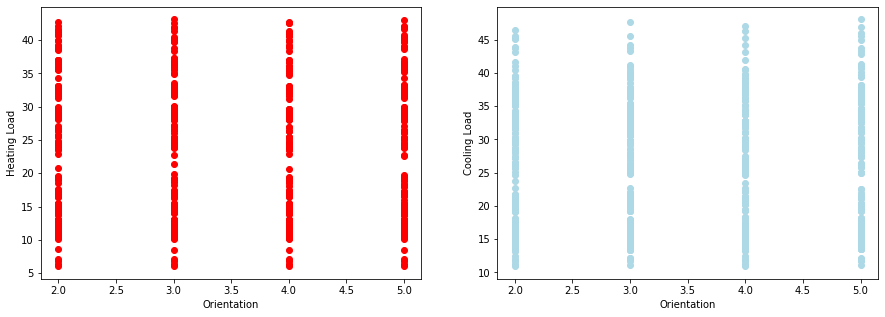

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
ax1.scatter(data['Orientation'], data['Heating Load'], color='red')
ax1.set_xlabel('Orientation')
ax1.set_ylabel('Heating Load')
ax2.scatter(data['Orientation'], data['Cooling Load'], color='lightblue')
ax2.set_xlabel('Orientation')
ax2.set_ylabel('Cooling Load')
plt.show()
#distribusi nya rata, kami yakin tidak berpengaruh besar
#data categorical

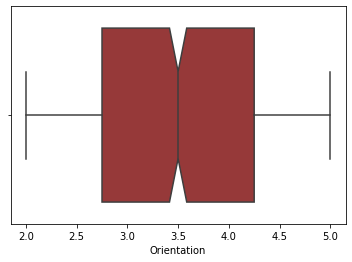

In [38]:
sns.boxplot(data['Orientation'], color="Brown",  notch=True)
#tidak ada outliers

<h2>Glazing Area

In [39]:
data['Glazing Area'].unique().size

4

In [40]:
data['Glazing Area'].unique()

array([0.  , 0.1 , 0.25, 0.4 ])

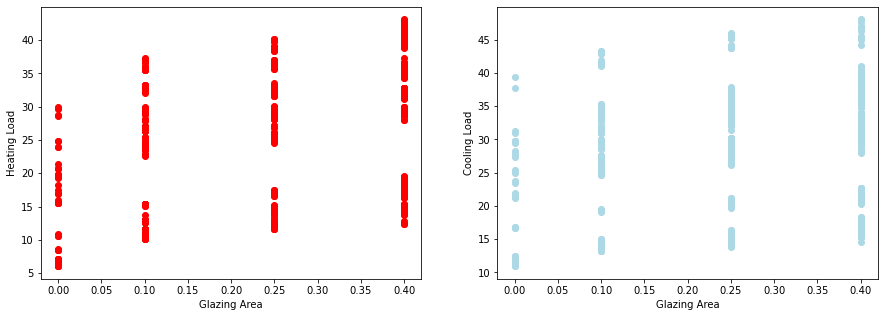

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
ax1.scatter(data['Glazing Area'], data['Heating Load'], color='red')
ax1.set_xlabel('Glazing Area')
ax1.set_ylabel('Heating Load')
ax2.scatter(data['Glazing Area'], data['Cooling Load'], color='lightblue')
ax2.set_xlabel('Glazing Area')
ax2.set_ylabel('Cooling Load')
plt.show()
#data ini kurang berpengaruh juga sepertinya, karena range load pada tiap data glazing area besar semua
#selain itu semakin meningkat glazing area maka semakin meningkat load nya

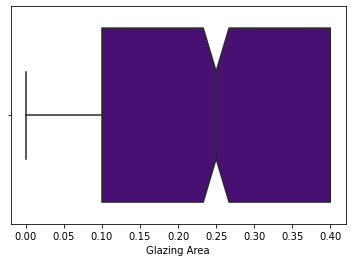

In [42]:
sns.boxplot(data['Glazing Area'], color="Indigo",  notch=True)
#tidak ada outliers

<h2> Glazing Area Datribution

In [43]:
data['Glazing Area Distribution'].unique().size

6

In [44]:
data['Glazing Area Distribution'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

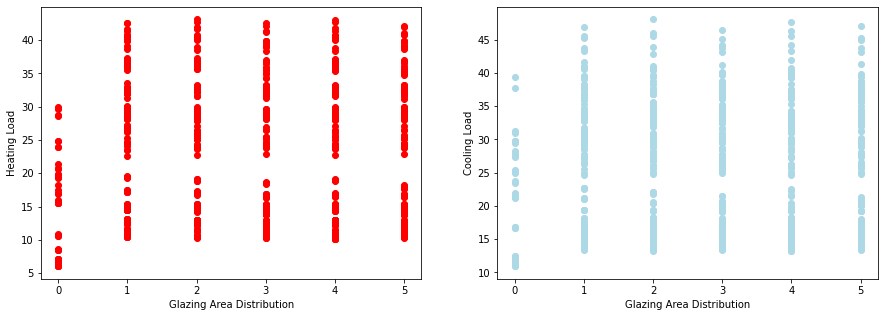

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
ax1.scatter(data['Glazing Area Distribution'], data['Heating Load'], color='red')
ax1.set_xlabel('Glazing Area Distribution')
ax1.set_ylabel('Heating Load')
ax2.scatter(data['Glazing Area Distribution'], data['Cooling Load'], color='lightblue')
ax2.set_xlabel('Glazing Area Distribution')
ax2.set_ylabel('Cooling Load')
plt.show()
#range lebih kecil saat istribusinya nol, tapi sisanya tidak terlalu berpengaruh
#data categorical

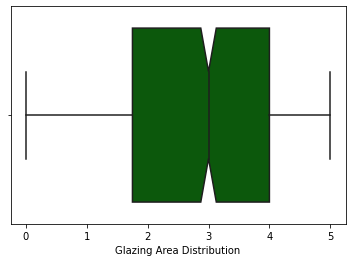

In [46]:
sns.boxplot(data['Glazing Area Distribution'], color="darkgreen",  notch=True)

In [47]:
data_encode = pd.concat([data,
                       pd.get_dummies(data['Orientation'], drop_first = True),
                       pd.get_dummies(data['Glazing Area Distribution'], drop_first = True)
                        ], axis=1)

In [48]:
data_encode.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,3,4,5,1,2,3,4,5
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,0,0,0,0,0,0,0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1,0,0,0,0,0,0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,0,1,0,0,0,0,0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,0,0,1,0,0,0,0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,0,0,0,0,0,0,0,0


<h2>Melihat korelasi antar variabel

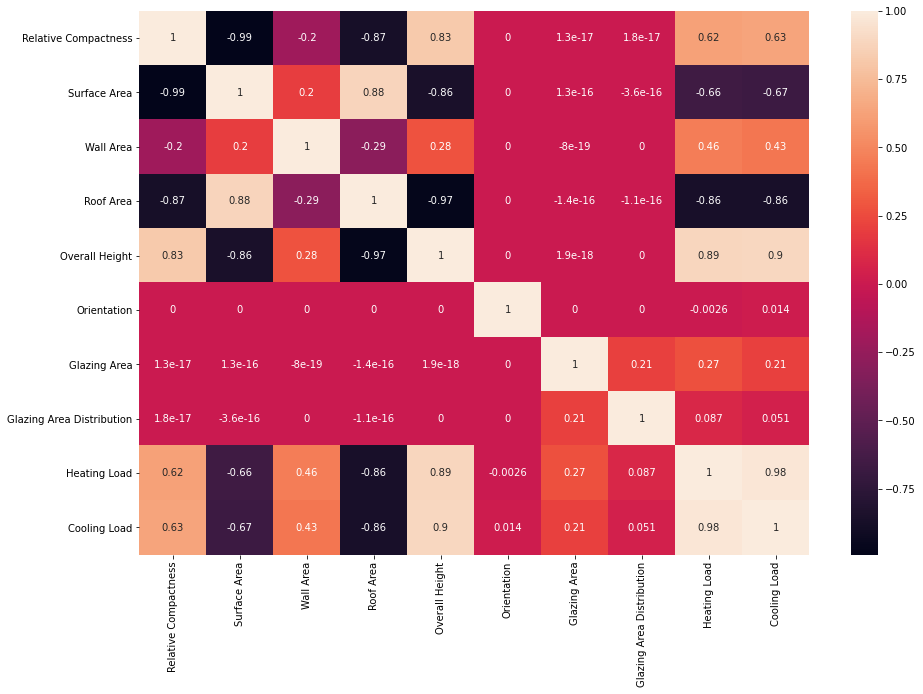

In [49]:
corrmat=data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

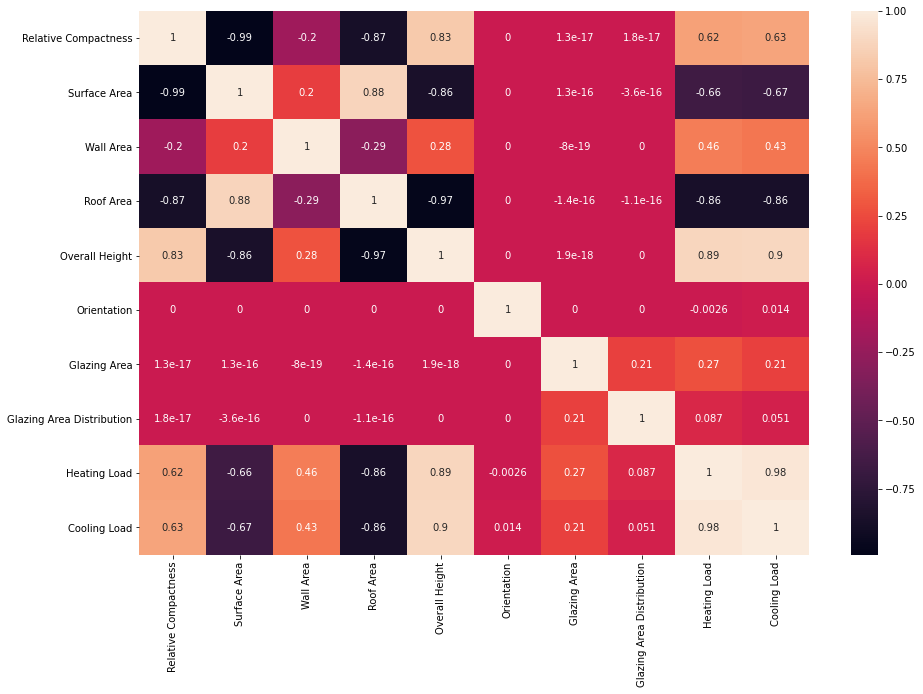

In [50]:
corrmat=data.corr(method='spearman')
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
#sepertinya orientation dan glazing area distribution tidak terlalu berpengaruh bagi heating load dan cooling load
#menggunakan correlasi pearson (linear)

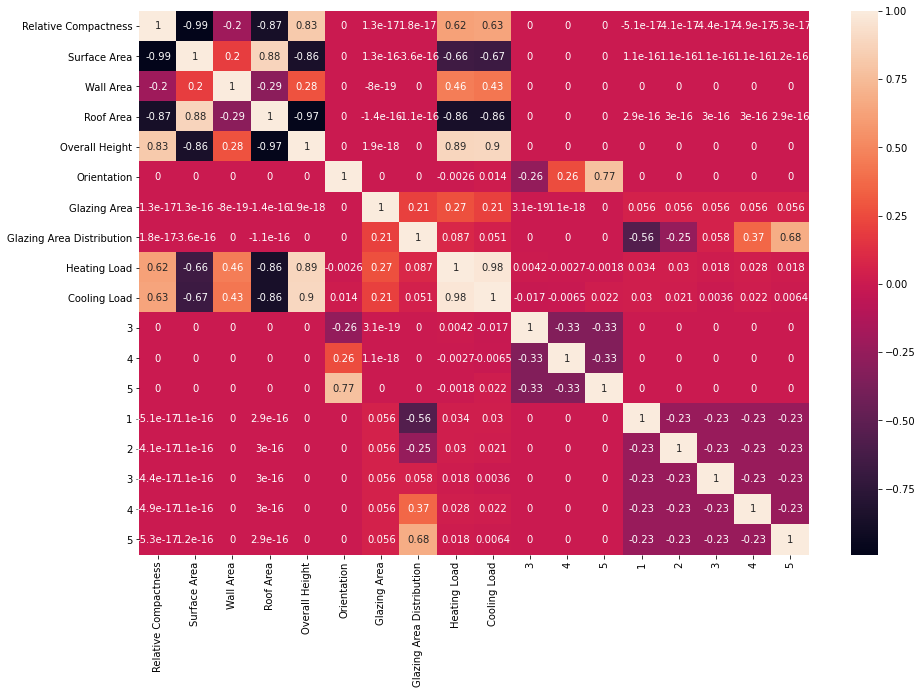

In [51]:
corrmat=data_encode.corr(method='spearman')
plt.figure(figsize=(15, 10))
sns.heatmap(data_encode.corr(), annot=True)

Kesimpulan sementara yang didapat :
- Tidak ada data yang bernilai null
- Tidak ada outliers pada data
- Data orientation dan glazing area distribution kurang berpengaruh terhadap heating load dan cooling load
- Data yang digunakan kurang beragam dan terlalu normal, kami memperkiakan bangunan yang disurvey merupakan bangunan sejenis

<h1>Data Preprocessing

<h2>Variabel Input (x) dan output (y)

<h3> untuk data yang belum distandarisasi

In [52]:
X = data.drop([ "Orientation", "Glazing Area Distribution", "Heating Load", "Cooling Load"], axis=1)
Y = data.drop(["Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
               "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution"], axis=1)

In [53]:
Y.head()

,Heating Load,Cooling Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [54]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state = None)

<h3> untuk data yang distandarisasi

In [55]:
scaler = StandardScaler()

In [56]:
x_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(Y_train)
x_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(Y_test)

<h1> Model

<h2> Menggunakan K-Neirest Neighbors - Regression

In [57]:
X.index

RangeIndex(start=0, stop=768, step=1)

In [58]:
k= round(sqrt(len(X_train.index)/2))

In [59]:
k

16

In [60]:
neigh = KNeighborsRegressor(k)

In [61]:
neigh.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                    weights='uniform')

In [62]:
y_pred_knn = neigh.predict(x_test)

In [63]:
y_pred_knn

array([[-0.91753791, -0.8919247 ],
       [-1.10350179, -1.09264252],
       [ 0.9472802 ,  0.87452349],
       [ 0.22389553,  0.32709932],
       [ 1.73250896,  1.55131375],
       [ 0.67616509,  0.74298927],
       [-0.94442128, -0.95401254],
       [ 0.59557664,  0.53629262],
       [ 1.25600736,  1.27609053],
       [ 1.73250896,  1.55131375],
       [ 0.22389553,  0.32709932],
       [-0.79329481, -0.70539839],
       [ 1.70223434,  1.6928346 ],
       [-1.10350179, -1.09264252],
       [-0.96618695, -0.96583879],
       [-1.05429782, -1.06090874],
       [ 1.25600736,  1.27609053],
       [ 0.79461224,  0.6516643 ],
       [ 1.25600736,  1.27609053],
       [-0.79329481, -0.70539839],
       [ 0.10624994,  0.11514656],
       [-0.74470743, -0.93062284],
       [-0.80809299, -0.82011306],
       [-0.97981361, -0.99993783],
       [ 1.25958359,  1.25237232],
       [ 0.90960648,  0.94167034],
       [ 1.01128235,  1.05500528],
       [ 1.26075511,  1.19337245],
       [-0.79329481,

In [64]:
Y_pred_knn = scaler.inverse_transform(y_pred_knn)

In [65]:
Y_pred_knn

array([[13.50054727, 16.51477867],
       [11.64976928, 14.61140088],
       [32.05987404, 33.26574933],
       [24.86049493, 28.0746057 ],
       [39.87474729, 39.68365265],
       [29.36164101, 32.01842941],
       [13.23299448, 15.92600878],
       [28.5595963 , 30.05835526],
       [35.13243551, 37.07375099],
       [39.87474729, 39.68365265],
       [24.86049493, 28.0746057 ],
       [14.73705842, 18.28358049],
       [39.57344358, 41.02567418],
       [11.64976928, 14.61140088],
       [13.01637491, 15.81386214],
       [12.13946451, 14.91232771],
       [35.13243551, 37.07375099],
       [30.54046877, 31.15240809],
       [35.13243551, 37.07375099],
       [14.73705842, 18.28358049],
       [23.68964467, 26.0646886 ],
       [15.22061713, 16.14780993],
       [14.58978166, 17.19575803],
       [12.88075756, 15.49050597],
       [35.1680274 , 36.84883466],
       [31.68493195, 33.90249306],
       [32.69684604, 34.97723175],
       [35.17968681, 36.2893475 ],
       [14.73705842,

In [66]:
neigh.score(x_test, y_test)

c:\users\dheny dwi prakoso\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9664185552325615

In [67]:
neigh.score(x_train, y_train)

c:\users\dheny dwi prakoso\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9667313256192961

In [68]:
r2_score(y_test, y_pred_knn)

0.9664185552325615

In [69]:
r2_score(Y_test, Y_pred_knn)

0.9664185552325615

<h2> Menggunakan Random Forest Regressor

In [70]:
regressor = RandomForestRegressor(n_estimators=16)

In [71]:
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=16, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [72]:
Y_pred_rf = regressor.predict(X_test)

In [73]:
regressor.score(X_test, Y_test)

c:\users\dheny dwi prakoso\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9843174560806645

In [74]:
regressor.score(X_train, Y_train)

c:\users\dheny dwi prakoso\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9857430618839612

In [75]:
r2_score(Y_test, Y_pred_rf)

0.9836286540638438

In [76]:
Y_pred_rf

array([[12.96841226, 16.04069697],
       [10.98655332, 14.03065476],
       [32.10906268, 32.80162029],
       [23.63264341, 26.62525403],
       [40.01743303, 39.46356171],
       [29.18204842, 31.66988288],
       [12.60204026, 15.37080865],
       [28.45934675, 29.73784278],
       [36.5066768 , 37.95114917],
       [40.01743303, 39.46356171],
       [23.63264341, 26.62525403],
       [15.30261914, 19.27765977],
       [39.37511559, 40.81179929],
       [10.98655332, 14.03065476],
       [12.41039955, 15.23250324],
       [11.50759409, 14.32471068],
       [36.5066768 , 37.95114917],
       [29.30228651, 30.38374822],
       [36.5066768 , 37.95114917],
       [15.30261914, 19.27765977],
       [24.33241258, 26.12176072],
       [14.44573311, 15.22534738],
       [13.87781645, 16.49515449],
       [12.25794703, 14.96064358],
       [35.7083506 , 36.99996846],
       [32.72033281, 34.03361893],
       [32.42505429, 34.55486646],
       [36.59984108, 37.02858774],
       [15.30261914,

<h2> Menggunakan ANN

In [77]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(6,), name='input'),
    Dense(128, activation='relu', name='hidden2'),
    Dense(64, activation='relu', name='hidden3'),
    Dense(32, activation='relu', name='hidden4'),
    Dense(2, activation='linear', name='output')
])

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 256)               1792      
_________________________________________________________________
hidden2 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden3 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden4 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 2)                 66        
Total params: 45,090
Trainable params: 45,090
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(x_train, y_train, epochs=100)

Train on 537 samples
Epoch 1/100
537/537 [==============================] - 2s 3ms/sample - loss: 0.4176
Epoch 2/100
537/537 [==============================] - 0s 131us/sample - loss: 0.1058
Epoch 3/100
537/537 [==============================] - 0s 86us/sample - loss: 0.0767
Epoch 4/100
537/537 [==============================] - 0s 88us/sample - loss: 0.0611
Epoch 5/100
537/537 [==============================] - 0s 80us/sample - loss: 0.0532
Epoch 6/100
537/537 [==============================] - 0s 62us/sample - loss: 0.0464
Epoch 7/100
537/537 [==============================] - 0s 60us/sample - loss: 0.0392
Epoch 8/100
537/537 [==============================] - 0s 58us/sample - loss: 0.0345
Epoch 9/100
537/537 [==============================] - 0s 60us/sample - loss: 0.0394
Epoch 10/100
537/537 [==============================] - 0s 58us/sample - loss: 0.0461
Epoch 11/100
537/537 [==============================] - 0s 60us/sample - loss: 0.0365
Epoch 12/100
537/537 [====================

In [79]:
y_ann = model.predict(x_test)

In [80]:
Y_ann = scaler.inverse_transform(y_ann)

In [81]:
r2_score(y_test, y_ann)

0.9779139384532913

In [82]:
r2_score(Y_test, Y_ann)

0.9779139388255654

<h1> Kesimpulan

Score dari model KNN : 0.94 <br>
Score dari model Random Forest : 0.98 <br>
Score dari ANN : 0.97 <br>
Berdasarkan score dari  model-model tersebut, Random Forest merupakan model terbaik dibanding model lain yang diuji
untuk memprediksi load

<h2> Save model Random Forest Regressor

In [83]:
import joblib

In [84]:
filename = 'model_random_forest.sav'
joblib.dump(regressor, filename)

['model_random_forest.sav']

coret-coret

In [85]:
loaded_model = joblib.load('model_random_forest.sav')

In [86]:
X_train

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
280,0.64,784.0,343.0,220.50,3.5,0.10
84,0.66,759.5,318.5,220.50,3.5,0.10
398,0.82,612.5,318.5,147.00,7.0,0.25
339,0.98,514.5,294.0,110.25,7.0,0.25
539,0.86,588.0,294.0,147.00,7.0,0.40
...,...,...,...,...,...,...
175,0.71,710.5,269.5,220.50,3.5,0.10
29,0.71,710.5,269.5,220.50,3.5,0.00
333,0.62,808.5,367.5,220.50,3.5,0.25
367,0.71,710.5,269.5,220.50,3.5,0.25


In [87]:
dummy = {0 : [0.5],
         1 : [780],
         2 : [318],
         3 : [100], 
         4 : [3], 
         5 : [0.25]}

In [88]:
dummy = pd.DataFrame(dummy, columns=(0,1,2,3,4,5))

In [89]:
dummy

,0,1,2,3,4,5
0,0.5,780,318,100,3,0.25


In [90]:
hasil = loaded_model.predict(dummy)

In [91]:
hasil = pd.DataFrame(hasil)

In [92]:
x =hasil[1].to_numpy()

In [93]:
x

array([18.59113405])

In [94]:
x[0]

18.5911340451384